# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [62]:
df = pd.read_csv("car_data.csv")

5

Linear regression equation for the given data is y = -0.17 X +  24764.56
0.02046344732348926


,Mileage
0,8221
1,9135
2,13196
3,16342
4,19832
...,...
799,16229
800,19095
801,20484
802,25979


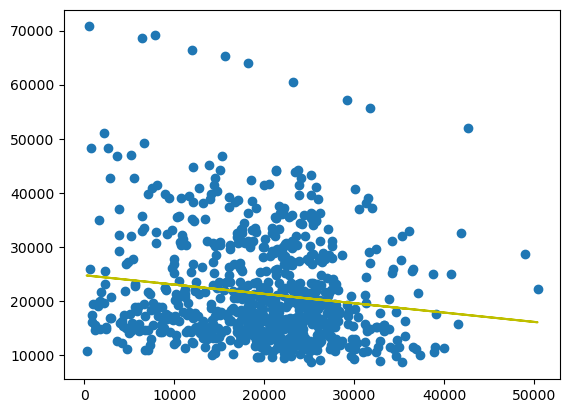

In [18]:
#Tasks, Part 1
from sklearn.linear_model import LinearRegression
x = df[['Mileage']]
y = df[['Price']]
model = LinearRegression()
model.fit(x,y)
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print("Linear regression equation for the given data is y =",format(round(slope,2)),"X + ",format(round(intercept,2)))
plt.scatter(x,y)
plt.plot(x,slope*x+intercept,color = 'y')
print(model.score(x,y))

In [4]:
#Tasks, Part 2
x = df.drop(['Price','Make','Model','Trim','Type'], axis=1)
y = df['Price']
model.fit(x,y)
model.score(x,y)

0.446264353672838

In [14]:
from itertools import combinations
def calculate_r2(features):
    lr = LinearRegression()
    lr.fit(x[list(features)],y)
    return lr.score(x[list(features)],y)
    
best_r2 = 0
best_combo = []
for i in range (1,len(x.columns)+1):
    for combo in combinations(x.columns,i):
        r2 = calculate_r2(combo)
        if r2>best_r2:
            best_r2 = r2
            best_combo = combo
print("Best r2 score is",best_r2," for combination",best_combo)

Best r2 score is 0.446264353672838  for combination ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')


In [58]:
x = pd.get_dummies(x)
print(x.shape)
lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

(804, 50)


0.9804768702447504

In [68]:
x.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather',
       'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3',
       'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],
      dtype='object')

KeyboardInterrupt: 